# OpenCV  ile Görüntü İşleme

## 1- RGB ve Grayscale Dönüşümü

### RGB Görüntü (Renkli)

Red, Green, Blue → 3 kanal içerir.

Her pikselin renk değeri, bu üç kanalın birleşimiyle oluşur.

Örnek: (120, 45, 200) → morumsu bir renk.
     
       (0 , 0, 0 ) -> siyah renk

       (255, 255, 255)-> beyaz


### Grayscale Görüntü (Gri Tonlamalı)

Sadece tek bir kanal vardır (siyah-beyaz arası).

Her piksel 0–255 arası bir aydınlık değeri alır.

0 = siyah, 255 = beyaz, ara değerler = gri.


###  NumPy ile RGB Görsel Oluştur

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 3x3 boyutunda rastgele bir RGB görsel (0-255 arası renk değerleri)
rgb_image = np.random.randint(0, 256, (3, 3, 3), dtype=np.uint8)

# BGR'den Grayscale dönüşüm
gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)

# Görsel verilerini göster
print("RGB Görsel (3x3):\n", rgb_image)
print("\nGrayscale Görsel (3x3):\n", gray_image)


RGB Görsel (3x3):
 [[[167 191  90]
  [ 82  54 203]
  [  9  72 151]]

 [[ 49 114 247]
  [ 94 229 200]
  [ 84   6  66]]

 [[105 106  96]
  [ 37   1 230]
  [ 30 218 216]]]

Grayscale Görsel (3x3):
 [[158 102  88]
 [146 205  33]
 [103  74 196]]


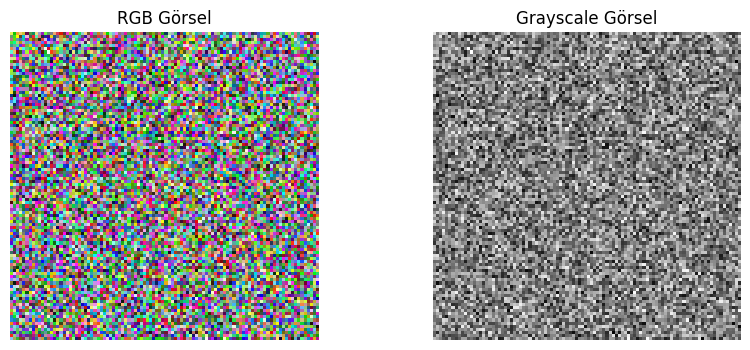

In [3]:
# 100x100 boyutunda yapay renkli görsel
rgb_large = np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8)

# Grayscale'e çevir
gray_large = cv2.cvtColor(rgb_large, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(rgb_large, cv2.COLOR_BGR2RGB))
plt.title("RGB Görsel")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(gray_large, cmap="gray")
plt.title("Grayscale Görsel")
plt.axis("off")

plt.show()



##  2- Çözünürlük Değişimi

Çözünürlük görüntünün boyutudur: Genişlik × Yükseklik (px)

### Çözünürlük Değiştirme

Görüntü işlemede (model girişine uygun hale getirmek için),

Görsel kalitesini azaltmak veya uyarlamak için yapılır.



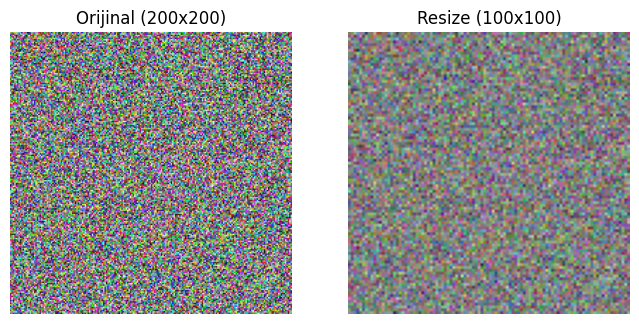

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Yapay görsel oluştur
gorsel = np.random.randint(0, 256, (200, 200, 3), dtype=np.uint8)

# Yeni boyut
yeni_gorsel = cv2.resize(gorsel, (100, 100))  # (genişlik, yükseklik)

# Görseli karşılaştıralım
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(gorsel, cv2.COLOR_BGR2RGB))
plt.title("Orijinal (200x200)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(yeni_gorsel, cv2.COLOR_BGR2RGB))
plt.title("Resize (100x100)")
plt.axis("off")

plt.show()


## 3-Kesme

Kesme işlemi, bir görüntünün belli bir dikdörtgen alanını alarak sadece o bölgeyle çalışmak demektir.

gorsel[y1:y2, x1:x2]

y1:y2 → yüksekliğin (satırların) başlangıç ve bitiş noktası

x1:x2 → genişliğin (sütunların) başlangıç ve bitiş noktası


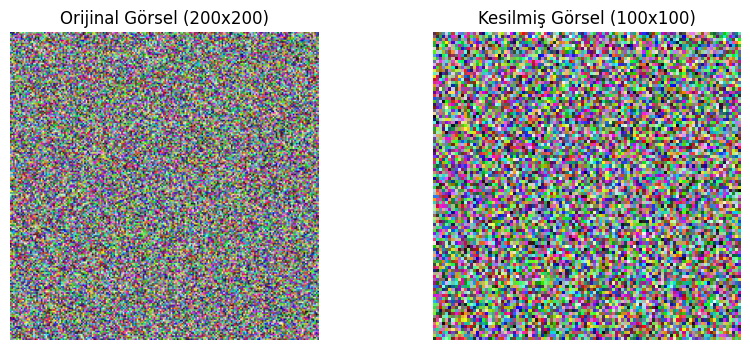

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 200x200 boyutlu rastgele görsel
gorsel = np.random.randint(0, 256, (200, 200, 3), dtype=np.uint8)

# Ortadaki 100x100’lük kısmı al
gorsel_kesilmis = gorsel[50:150, 50:150]

# Görselleri karşılaştır
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(gorsel, cv2.COLOR_BGR2RGB))
plt.title("Orijinal Görsel (200x200)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(gorsel_kesilmis, cv2.COLOR_BGR2RGB))
plt.title("Kesilmiş Görsel (100x100)")
plt.axis("off")

plt.show()


## 4-Rezise

resize, bir görselin çözünürlüğünü (piksel boyutlarını) değiştirmek demektir.

yeni_gorsel = cv2.resize(gorsel, (yeni_genislik, yeni_yukseklik))

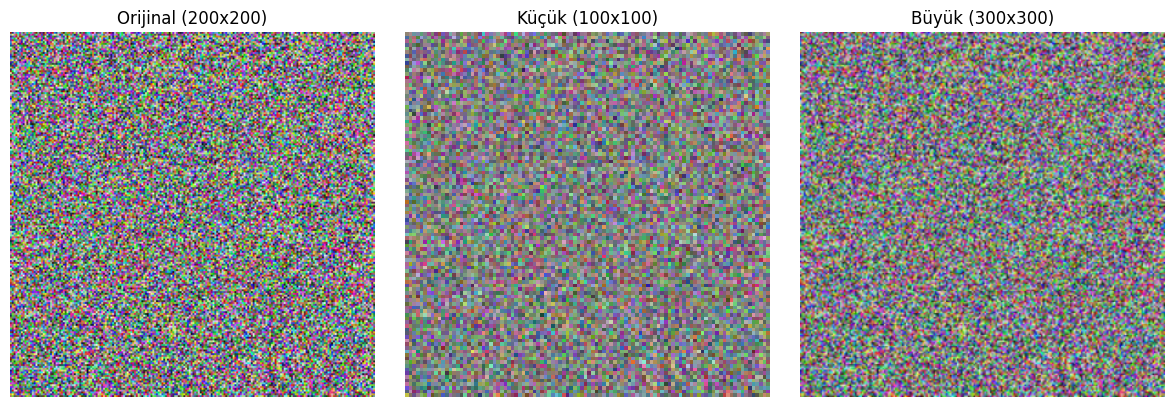

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1200x200 boyutlu rastgele bir RGB görsel oluştur
gorsel = np.random.randint(0, 256, (200, 200, 3), dtype=np.uint8)

# Çözünürlük değişimi (resize)
kucuk_gorsel = cv2.resize(gorsel, (100, 100))     # Küçült
buyuk_gorsel = cv2.resize(gorsel, (300, 300))     # Büyüt

#  Sonuçları görselleştir
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(gorsel, cv2.COLOR_BGR2RGB))
plt.title("Orijinal (200x200)")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(kucuk_gorsel, cv2.COLOR_BGR2RGB))
plt.title("Küçük (100x100)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(buyuk_gorsel, cv2.COLOR_BGR2RGB))
plt.title("Büyük (300x300)")
plt.axis("off")

plt.tight_layout()
plt.show()


### 5-Rotate(Döndürme)

Görseli saat yönünde veya tersine, belirli bir açıyla döndürmek demektir

Döndürme Matrisi Oluşturma:

M = cv2.getRotationMatrix2D(center, angle, scale)

center: döndürme merkezi (örneğin: görselin tam ortası)

angle: derece cinsinden açı (örnek: 45, -90)

scale: 1.0 → orijinal boyutta bırak, büyütmek/küçültmek istersen değiştir

Görseli Döndürme:

dondurulmus = cv2.warpAffine(gorsel, M, (genislik, yukseklik))



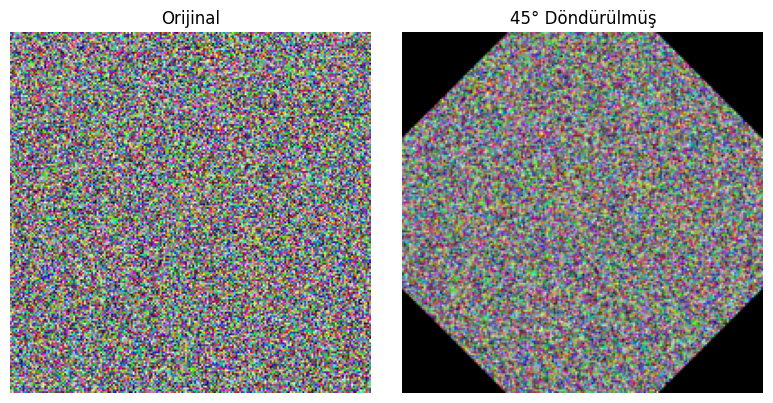

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#  Yapay görsel oluştur
gorsel = np.random.randint(0, 256, (200, 200, 3), dtype=np.uint8)

#  Boyutları ve merkez koordinatı
(h, w) = gorsel.shape[:2]
center = (w // 2, h // 2)

# 45 derece döndürme matrisi
M = cv2.getRotationMatrix2D(center, 45, 1.0)

#  Görseli döndür
dondurulmus = cv2.warpAffine(gorsel, M, (w, h))

#  Göster
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(gorsel, cv2.COLOR_BGR2RGB))
plt.title("Orijinal")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dondurulmus, cv2.COLOR_BGR2RGB))
plt.title("45° Döndürülmüş")
plt.axis("off")

plt.tight_layout()
plt.show()
